In [3]:
# import pandas for data manipulation
import pandas as pd

In [4]:
# Open the text file and read all lines
with open('Sentences_75Agree_sample.txt', 'r', encoding='latin1') as file:
    lines = file.readlines()
lines[:5]

# To close the file automatically without calling the close() method, you use the 'with' statement as here
# '''
# https://www.pythontutorial.net/python-basics/python-read-text-file/
# The code in the previous examples works fine with ASCII text files. However, if you’re dealing with other languages such as Japanese, Chinese, and
# Korean, the text file is not a simple ASCII text file. And it’s likely a UTF-8 file that uses more than just the standard ASCII text characters.

# To open a UTF-8 text file, you need to pass the encoding='utf-8' to the open() function to instruct it to expect UTF-8 characters from the file.
# '''

['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .@neutral\n',
 'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .@positive\n',
 "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .@positive\n",
 'In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn .@positive\n',
 'Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales .@positive\n']

In [5]:
# Split each linr at '@' to separate sentences and labels and strip whitespaces
data = [line.strip().split('@') for line in lines]

In [6]:
data[:3]

[['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .',
  'neutral'],
 ['With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .',
  'positive'],
 ["For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",
  'positive']]

In [7]:
df = pd.DataFrame(data, columns=['Sentence', 'Label'])

In [8]:
df.head()

,Sentence,Label
0,"According to Gran , the company has no plans t...",neutral
1,With the new production plant the company woul...,positive
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,"In the third quarter of 2010 , net sales incre...",positive
4,Operating profit rose to EUR 13.1 mn from EUR ...,positive


# Visual Analysis of Label Distribution and Sentence Lengths in Text Data

In [11]:
# Pandas already imported and Matplotlib to be imported
import matplotlib.pyplot as plt

In [12]:
# Create Df for 'Label' column for Analysis and easy mannipulation
labels_df = pd.DataFrame(df.Label, columns=['Label'])
labels_df.head()

,Label
0,neutral
1,positive
2,positive
3,positive
4,positive


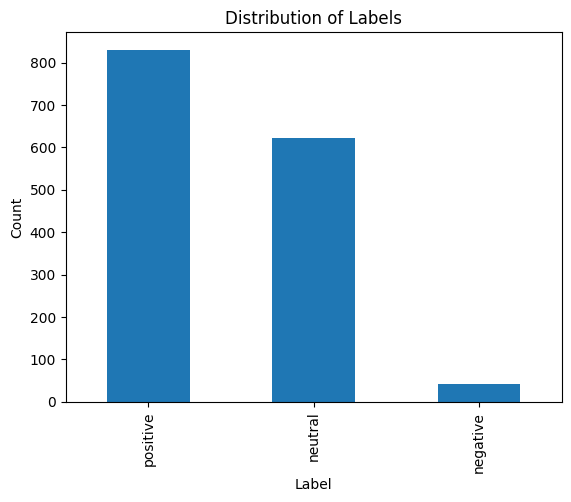

In [13]:
# Use a bar chart to visualize how frequently each labe occurs in the dataset
labels_df['Label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [14]:
# Determine the number of words in each sentence to analyze sentence length
sentence_lengths = [len(sentence.split()) for sentence in df.Sentence]
sentence_lengths[:5]

[25, 33, 39, 29, 24]

[]

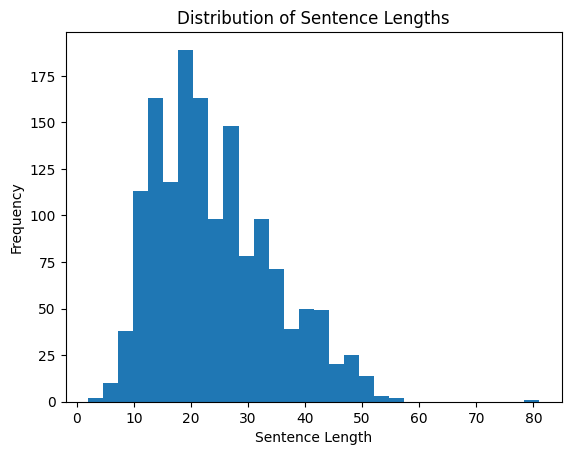

In [15]:
# Plot a histogram to show the distribution of sentence lengths in dataset
plt.hist(sentence_lengths, bins=30)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.plot()

# Visualize Top 20 Most Frequent Words in Text Data

In [18]:
# Import Counter for frequency analysis and seaborn for advanced plotting
from collections import Counter
import seaborn as sns

In [19]:
# Flatten the list of sentences into words
words = [word for sentence in df.Sentence for word in sentence.split()]
words[:10]

['According', 'to', 'Gran', ',', 'the', 'company', 'has', 'no', 'plans', 'to']

In [20]:
# Utilize Counter to find top 20 most common words
common_words = Counter(words).most_common(20)
common_words[:5]

[('.', 1463), (',', 1461), ('the', 1404), ('of', 1016), ('to', 901)]

In [21]:
# Create a Dataframe from the most common words for easy plotting with seaborn
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
common_words_df.head()

,Word,Frequency
0,.,1463
1,",",1461
2,the,1404
3,of,1016
4,to,901


[]

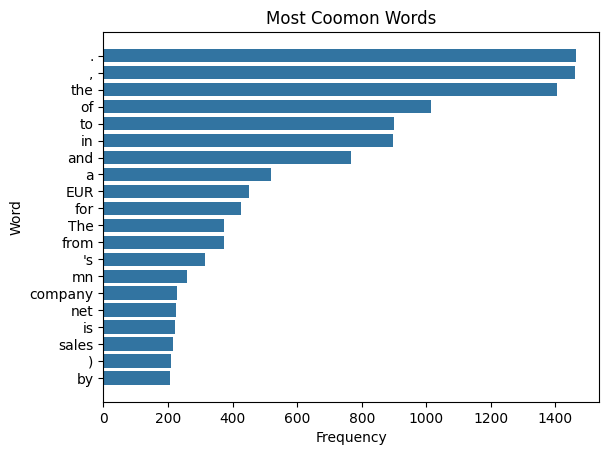

In [22]:
# Use Seaborn's barplot to create horizontal bar plot
sns.barplot(data=common_words_df, x='Frequency', y='Word')
plt.title('Most Coomon Words')
plt.plot()

# Analyze and Visualize Most Frequent Bi-grams in Text Data

In [25]:
# '''
# In the Bigram Language Model, we find bigrams, which are two words coming together in the corpus(the entire collection of words/sentences).

# For example: In the sentence, Edpresso is awesome, and user-friendly the bigrams are :

# “Edpresso is”
# “is awesome”
# “and user”
# “user friendly”
# '''

In [26]:
# Import CountVectorizer for text feature extraction and Seaborn for plotting
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
# Set up CountVectorizer to consider bi0grams only
vectorizer = CountVectorizer(ngram_range=(2,2))
vectorizer

CountVectorizer(ngram_range=(2, 2))

In [28]:
# Apply the vectorizer to the sentences to get the bi-gram counts
ngram_counts = vectorizer.fit_transform(df.Sentence)
ngram_counts

<1492x17758 sparse matrix of type '<class 'numpy.int64'>'
	with 28938 stored elements in Compressed Sparse Row format>

In [29]:
# Aggregate counts and get feature names (bi-grams)
ngram_sum = ngram_counts.sum(axis=0)
ngram_list = [(ngram, ngram_sum[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]
ngram_list[:5]

[('according to', 30),
 ('to gran', 1),
 ('gran the', 1),
 ('the company', 165),
 ('company has', 12)]

In [30]:
# Sort the bi-grams by their frequency count in descending order
common_ngrams = sorted(ngram_list, key=lambda x: x[1], reverse=True)[:20]

In [31]:
# Create a DataFrame for the most common bi-grams to facilitate visualization
common_ngrams_df = pd.DataFrame(common_ngrams, columns=['N-gram', 'Frequency'])
common_ngrams_df.head()

,N-gram,Frequency
0,in the,264
1,of the,186
2,for the,175
3,the company,165
4,net sales,143


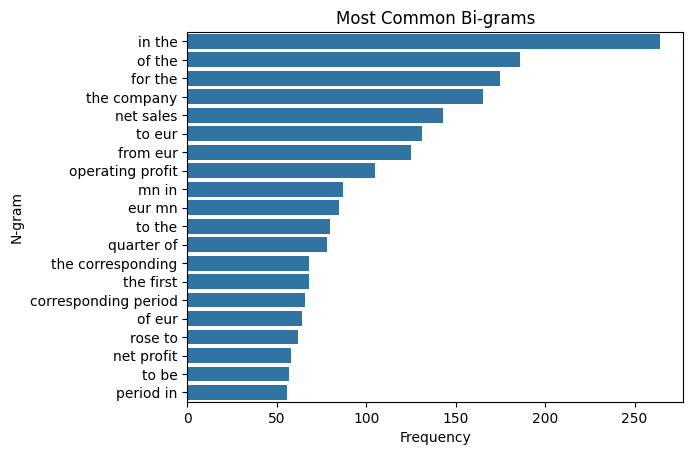

In [32]:
# Use seaborn to create a bar plot for the bi-gram frequencies
sns.barplot(data=common_ngrams_df, x='Frequency', y='N-gram')
plt.title('Most Common Bi-grams')  # Adding a title to the plot
plt.show()                          # Display the visualization

# Analyze Sentiment Distribution Using Positive and Negative Word Counts

In [35]:
# Create lists of words associated with positive and negative sentiments
positive_words = ['good', 'great', 'positive', 'profit', 'up', 'increase']
negative_words = ['bad', 'poor', 'negative', 'loss', 'down', 'decrease']

In [36]:
# Calculate the frequency of positive and negative words in the dataset
positive_counts = sum([sentence.lower().count(word) for sentence in df['Sentence'] for word in positive_words])
negative_counts = sum([sentence.lower().count(word) for sentence in df['Sentence'] for word in negative_words])

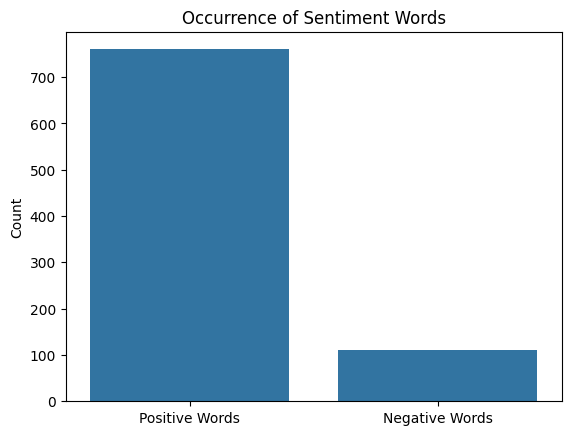

In [37]:
# Use seaborn to create a bar plot showing the counts of positive and negative sentiment words
sns.barplot(x=['Positive Words', 'Negative Words'], y=[positive_counts, negative_counts])
plt.title('Occurrence of Sentiment Words')  # Set the title of the plot
plt.ylabel('Count')                          # Set the y-axis label
plt.show()                                   # Display the plot

# Text Data Preprocessing for Sentiment Analysis Model

In [40]:
# Start by defining a function to clean the text data, aiming to standardize it for analysis.
import re

# Function to clean text data
def clean_text(text):
    text = re.sub(r"[^\w\s]", '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\s+", ' ', text)  # Collapse multiple spaces to one
    return text.strip()  # Remove leading and trailing spaces

In [41]:
df['Sentence'].head()

0    According to Gran , the company has no plans t...
1    With the new production plant the company woul...
2    For the last quarter of 2010 , Componenta 's n...
3    In the third quarter of 2010 , net sales incre...
4    Operating profit rose to EUR 13.1 mn from EUR ...
Name: Sentence, dtype: object

In [42]:
# Apply the text cleaning function to each sentence in your DataFrame.
# Clean sentences in the DataFrame
df['Cleaned_Sentence'] = df['Sentence'].apply(clean_text)
df.head()

,Sentence,Label,Cleaned_Sentence
0,"According to Gran , the company has no plans t...",neutral,according to gran the company has no plans to ...
1,With the new production plant the company woul...,positive,with the new production plant the company woul...
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of 2010 componenta s net ...
3,"In the third quarter of 2010 , net sales incre...",positive,in the third quarter of 2010 net sales increas...
4,Operating profit rose to EUR 13.1 mn from EUR ...,positive,operating profit rose to eur 131 mn from eur 8...


In [43]:
# Use TF-IDF Vectorizer to transform cleaned sentences into numerical vectors.
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and apply TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Sentence'])
X

<1492x5543 sparse matrix of type '<class 'numpy.float64'>'
	with 27277 stored elements in Compressed Sparse Row format>

In [44]:
# Encode the textual labels to numeric form using the LabelEncoder.
from sklearn.preprocessing import LabelEncoder

# Encode labels to integers
encoder = LabelEncoder()
y = encoder.fit_transform(df['Label'])
y

array([1, 2, 2, ..., 2, 2, 2])

In [45]:
# Split your data into a training set and a testing set with an 80-20 split.
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1502)
X_train

<1193x5543 sparse matrix of type '<class 'numpy.float64'>'
	with 21874 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.model_selection import train_test_split

# Assuming you already have X_train and y_train
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train.toarray(), y_train, test_size=0.2, random_state=42
)

In [47]:
# Convert the sparse matrix from vectorization into a dense matrix for model compatibility.
# Convert sparse matrices to dense for the model input
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [48]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Develop and Visualize a TensorFlow Model for Multi-Class Classification

In [51]:
# Initialize the TensorFlow Sequential model:
# Import TensorFlow
import tensorflow as tf

# Define the Sequential model with specified layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # 64-neuron layer
    tf.keras.layers.Dropout(0.5),  # Dropout for regularization
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])

C:\Users\Lalit Hire\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
# Compile the Sequential model:
# Compile the model with an optimizer, loss function, and evaluation metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
# Display the model's architecture:
# Output the model summary to understand its structure
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       354,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,011 (1.35 MB)

 Trainable params: 355,011 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Train the model with the dataset:
# Fit the model to the training data, validating against the test data
history = model.fit(X_train_dense, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test_dense, y_test))

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5081 - loss: 1.0597 - val_accuracy: 0.5518 - val_loss: 0.9298
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6118 - loss: 0.8697 - val_accuracy: 0.5987 - val_loss: 0.7808
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7489 - loss: 0.7003 - val_accuracy: 0.7659 - val_loss: 0.6769
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8759 - loss: 0.5528 - val_accuracy: 0.8094 - val_loss: 0.5973
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9114 - loss: 0.4282 - val_accuracy: 0.8361 - val_loss: 0.5398
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9392 - loss: 0.3422 - val_accuracy: 0.8395 - val_loss: 0.5001
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9525 - loss: 0.2590 - val_accuracy: 0.8395 - val_loss: 0.4724
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9572 - loss: 0.2107 - val_accuracy: 0.8428 - val_loss

In [55]:
# Evaluate the trained model's performance:
# Evaluate the model on test dataset
loss, accuracy = model.evaluate(X_test_dense, y_test)
# Print loss and accuracy
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8588 - loss: 0.3960 
Loss: 0.42937135696411133
Accuracy: 0.8361204266548157


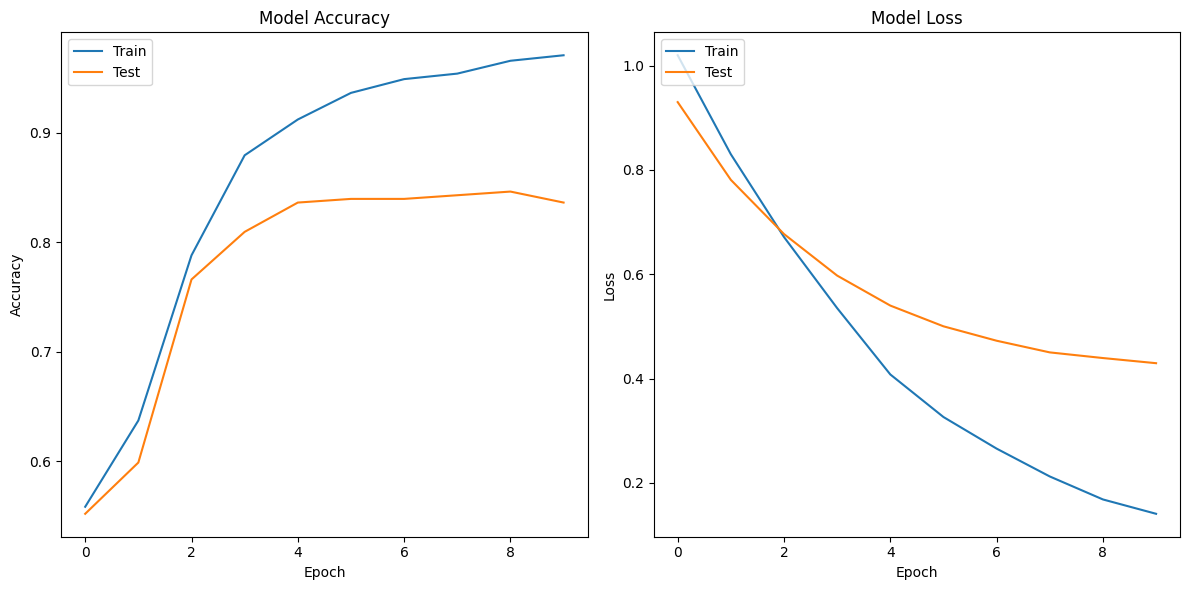

In [56]:
# Visualize the training and validation metrics:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Set up the plotting environment
plt.figure(figsize=(12,6))

# Plot accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

# Optimize Neural Network Hyperparameters Using SciKeras

In [58]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Ignore a specific category of warning, e.g., DeprecationWarning
# warnings.filterwarnings("ignore", category=DeprecationWarning)

# Ignore warnings within a specific block of code using a context manager
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Code that might generate warnings
    # ...

In [59]:
from sklearn.model_selection import train_test_split

# Convert sparse to dense if needed
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Split training data for validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_dense, y_train, test_size=0.2, random_state=42
)

In [109]:
from tensorflow import keras

def create_model(units=64, activation='relu', dropout=0.0):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units, activation=activation, input_shape=(X_train_split.shape[1],)))
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(len(set(y_train)), activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [111]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Wrap the model
clf = KerasClassifier(model=create_model, epochs=10, verbose=0)

In [113]:
param_grid = {
    "model__units": [64, 128, 256, 512],
    "model__activation": ["relu", "tanh"],
    "model__dropout": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

In [115]:
grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=3)
grid.fit(X_train_split, y_train_split)

C:\Users\Lalit Hire\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Lalit Hire\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Lalit Hire\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regula

GridSearchCV(cv=3,
             estimator=KerasClassifier(epochs=10, model=<function create_model at 0x0000012B70F6FBA0>, verbose=0),
             param_grid={'model__activation': ['relu', 'tanh'],
                         'model__dropout': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'model__units': [64, 128, 256, 512]},
             scoring='accuracy')

In [117]:
print("Best parameters:", grid.best_params_)

best_model = grid.best_estimator_
test_acc = best_model.score(X_test_dense, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Best parameters: {'model__activation': 'tanh', 'model__dropout': 0.3, 'model__units': 512}
Test Accuracy: 0.8060


In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test_dense)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.80      0.78      0.79       127
           2       0.81      0.86      0.83       164

    accuracy                           0.81       299
   macro avg       0.71      0.59      0.61       299
weighted avg       0.80      0.81      0.80       299



In [121]:
final_model = create_model(units=512, activation='tanh', dropout=0.3)
final_model.fit(X_train_dense, y_train, epochs=20, validation_split=0.2)

C:\Users\Lalit Hire\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5514 - loss: 0.9587 - val_accuracy: 0.7364 - val_loss: 0.6266
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8939 - loss: 0.5277 - val_accuracy: 0.7908 - val_loss: 0.4887
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9414 - loss: 0.2868 - val_accuracy: 0.8452 - val_loss: 0.4253
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9749 - loss: 0.1421 - val_accuracy: 0.8536 - val_loss: 0.4121
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9841 - loss: 0.0769 - val_accuracy: 0.8494 - val_loss: 0.4054
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9969 - loss: 0.0418 - val_accuracy: 0.8452 - val_loss: 0.4046
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 0.0262 - val_accuracy: 0.8452 - val_loss: 0.4077
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 0.0184 - val_accuracy: 0.8452 - v

In [123]:
# Evaluate on test set
loss, accuracy = final_model.evaluate(X_test_dense, y_test, verbose=1)
print(f"Final Test Accuracy: {accuracy:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8073 - loss: 0.4409
Final Test Accuracy: 0.8094


In [125]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = np.argmax(final_model.predict(X_test_dense), axis=1)

print("Classification Report:\n", classification_report(y_test, y_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.79      0.82      0.80       127
           2       0.83      0.84      0.83       164

    accuracy                           0.81       299
   macro avg       0.71      0.59      0.61       299
weighted avg       0.80      0.81      0.80       299



Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.8494 - val_loss: 0.4584
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8494 - val_loss: 0.4613
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8494 - val_loss: 0.4640
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8494 - val_loss: 0.4670
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8494 - val_loss: 0.4696
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8494 - val_loss: 0.4722
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8494 - val_loss: 0.4744
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8494 - v

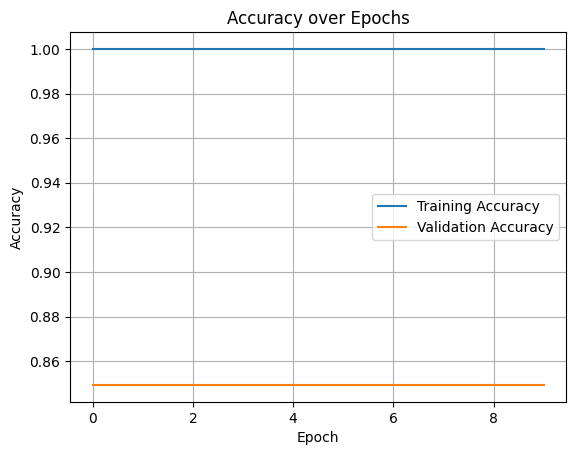

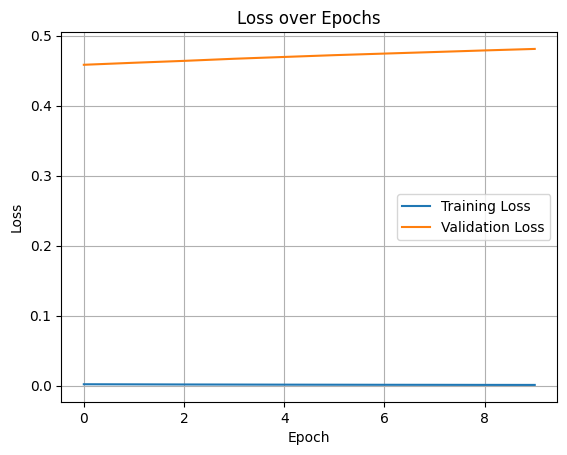

In [127]:
history = final_model.fit(X_train_dense, y_train, epochs=10, batch_size=32, validation_split=0.2)

import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [129]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.79      0.82      0.80       127
           2       0.83      0.84      0.83       164

    accuracy                           0.81       299
   macro avg       0.71      0.59      0.61       299
weighted avg       0.80      0.81      0.80       299



In [138]:
final_model.save("sentiment_classifier_best.h5")

In [140]:
import joblib
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")  # or whatever you used

['tfidf_vectorizer.pkl']